In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.metrics.regression import r2_score

<IPython.core.display.Javascript object>


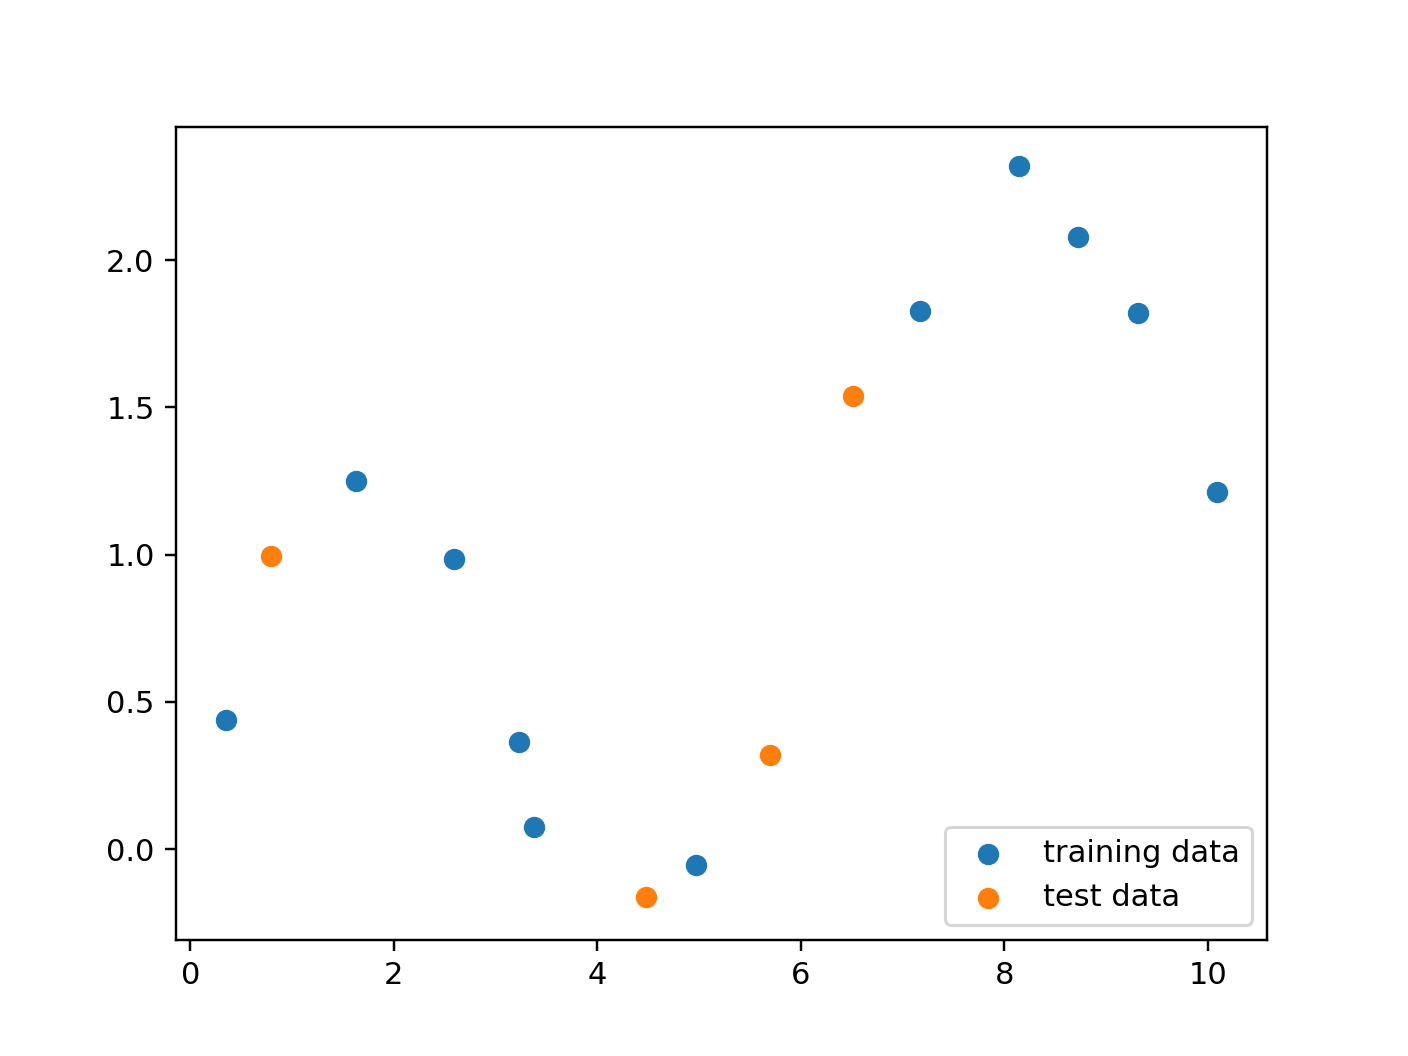

In [126]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

In [127]:
results = np.zeros([4,100])

In [124]:
#poly = PolynomialFeatures(degree=1)
#X_train = X_train.reshape(-1, 1)
#X_train_poly = poly.fit_transform(X_train)
#lm = LinearRegression().fit(X_train_poly, y_train)
#test_x = np.linspace(0,10,100).reshape(-1,1)
#test_x_poly = poly.transform(test_x)
#y_predict = lm.predict(test_x_poly)

In [135]:
for i in zip((1,3,6,9), (0,1,2,3)):
    poly = PolynomialFeatures(degree=i[0])
    train_x = X_train.reshape(-1, 1)
    X_train_poly = poly.fit_transform(train_x)
    lm = LinearRegression().fit(X_train_poly, y_train)
    test_x = np.linspace(0,10,100).reshape(-1,1)
    test_x_poly = poly.transform(test_x)
    y_predict = lm.predict(test_x_poly)
    results[i[1],:] = y_predict.flatten() 

In [136]:
results.shape

(4, 100)

In [233]:
r2_train = []
r2_test = []
for i in np.arange(0,10):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
    lm = LinearRegression().fit(X_train_poly, y_train)
    r2_train.append(lm.score(X_train_poly, y_train))
    r2_test.append(lm.score(X_test_poly, y_test))
r2_train = np.array(r2_train)
r2_test = np.array(r2_test)

In [259]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    r2_train = []
    r2_test = []
    for i in np.arange(0,10):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
        lm = LinearRegression().fit(X_train_poly, y_train)
        r2_train.append(lm.score(X_train_poly, y_train))
        r2_test.append(lm.score(X_test_poly, y_test))
        #print(r2_score(y_true=y_train, y_pred=lm.predict(X_train_poly)))
        #print(r2_score(y_true=y_test, y_pred=lm.predict(X_test_poly)))
    r2_train = np.array(r2_train)
    r2_test = np.array(r2_test)
    return((r2_train, r2_test))

In [244]:
df = pd.DataFrame(np.arange(0,10), columns=['Degree'])
df['R2 Train'] = answer_two()[0]
df['R2 Test'] = answer_two()[1]

In [250]:
df['err'] = df['R2 Train'] - df['R2 Test']

In [254]:
df

Degree  R2 Train   R2 Test       err
0       0  0.000000 -0.478086  0.478086
1       1  0.429246 -0.452371  0.881617
2       2  0.451100 -0.068570  0.519670
3       3  0.587200  0.005331  0.581868
4       4  0.919419  0.730049  0.189370
5       5  0.975786  0.877083  0.098703
6       6  0.990182  0.921409  0.068773
7       7  0.993525  0.920215  0.073310
8       8  0.996375  0.632479  0.363896
9       9  0.998037 -0.645249  1.643286

In [165]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    results = np.zeros([4,100])
    for i in zip((1,3,6,9), (0,1,2,3)):
        poly = PolynomialFeatures(degree=i[0])
        train_x = X_train.reshape(-1, 1)
        X_train_poly = poly.fit_transform(train_x)
        lm = LinearRegression().fit(X_train_poly, y_train)
        test_x = np.linspace(0,10,100).reshape(-1,1)
        test_x_poly = poly.transform(test_x)
        y_predict = lm.predict(test_x_poly)
        results[i[1],:] = y_predict.flatten() 
    return(results)

<IPython.core.display.Javascript object>


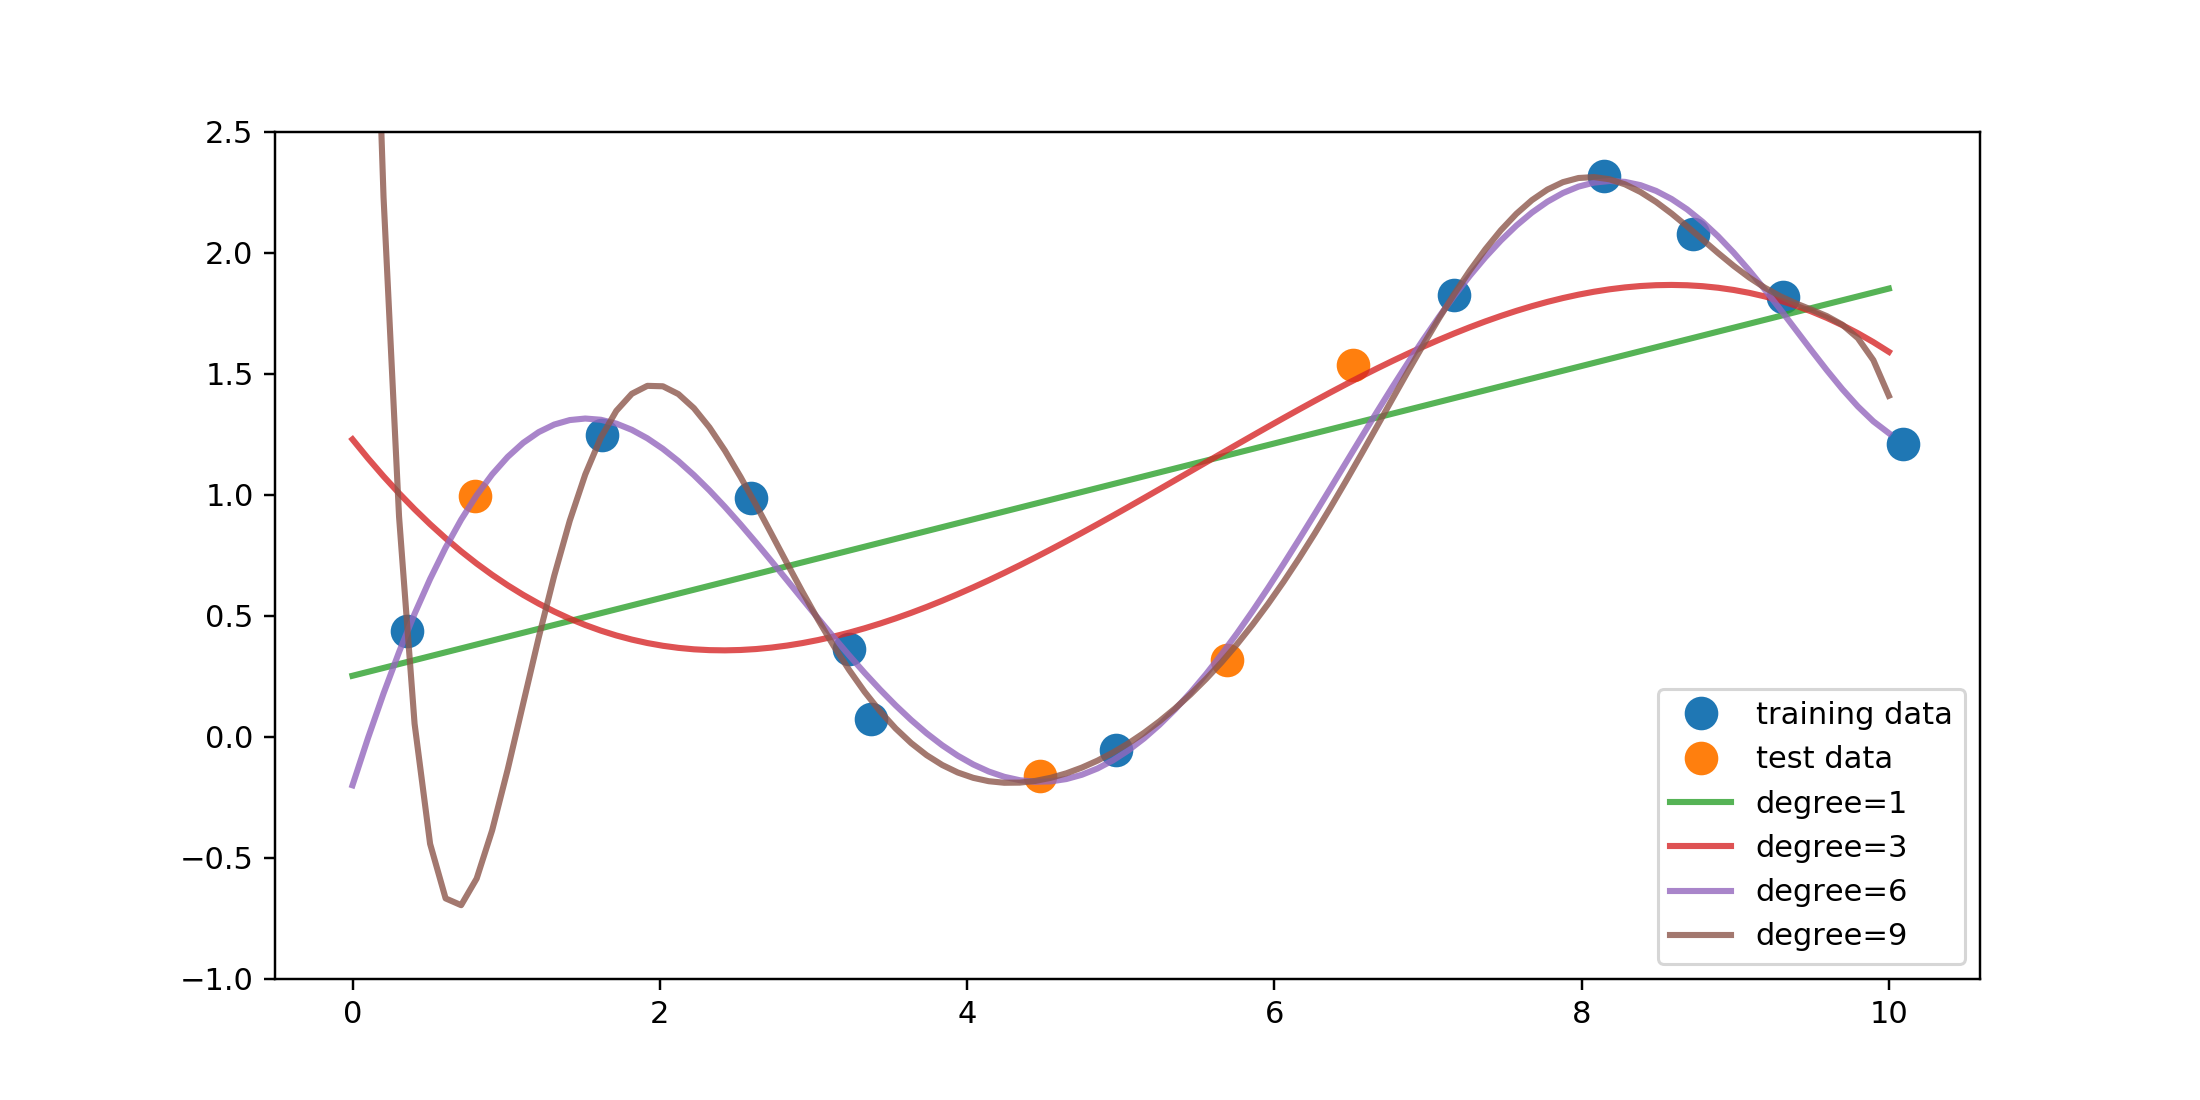

In [166]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

In [207]:
def three():
    res = np.zeros([10,100])
    for i in np.arange(0,10):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        lm = LinearRegression().fit(X_train_poly, y_train)
        test_x = np.linspace(0,10,100).reshape(-1,1)
        test_x_poly = poly.transform(test_x)
        y_predict = lm.predict(test_x_poly)
        res[i,:] = y_predict.flatten()
        #print(str(i) + " Complete")
    return(res)

<IPython.core.display.Javascript object>


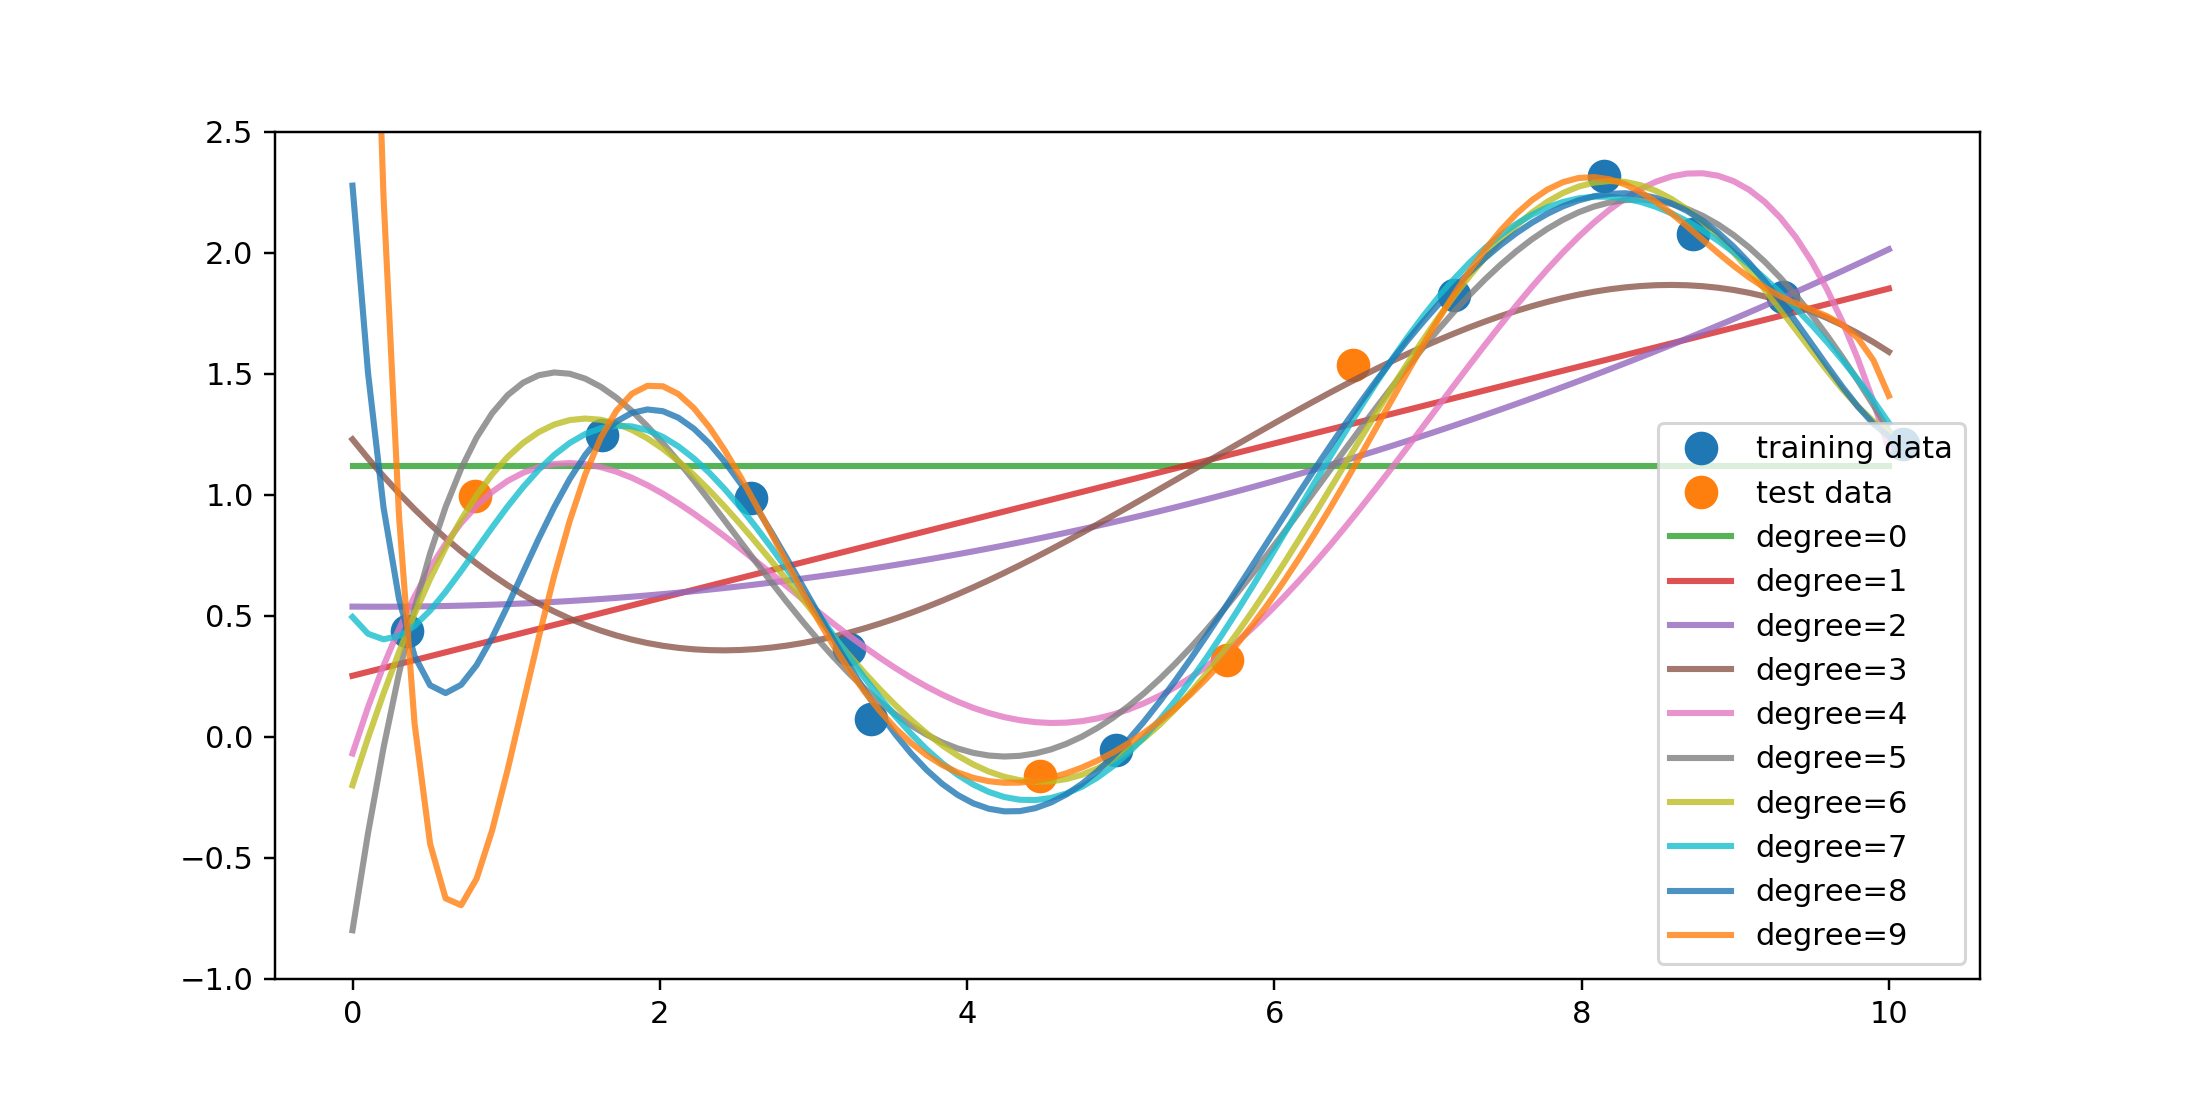

In [211]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_three(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i in np.arange(0,10):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(i))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_three(three())

<IPython.core.display.Javascript object>


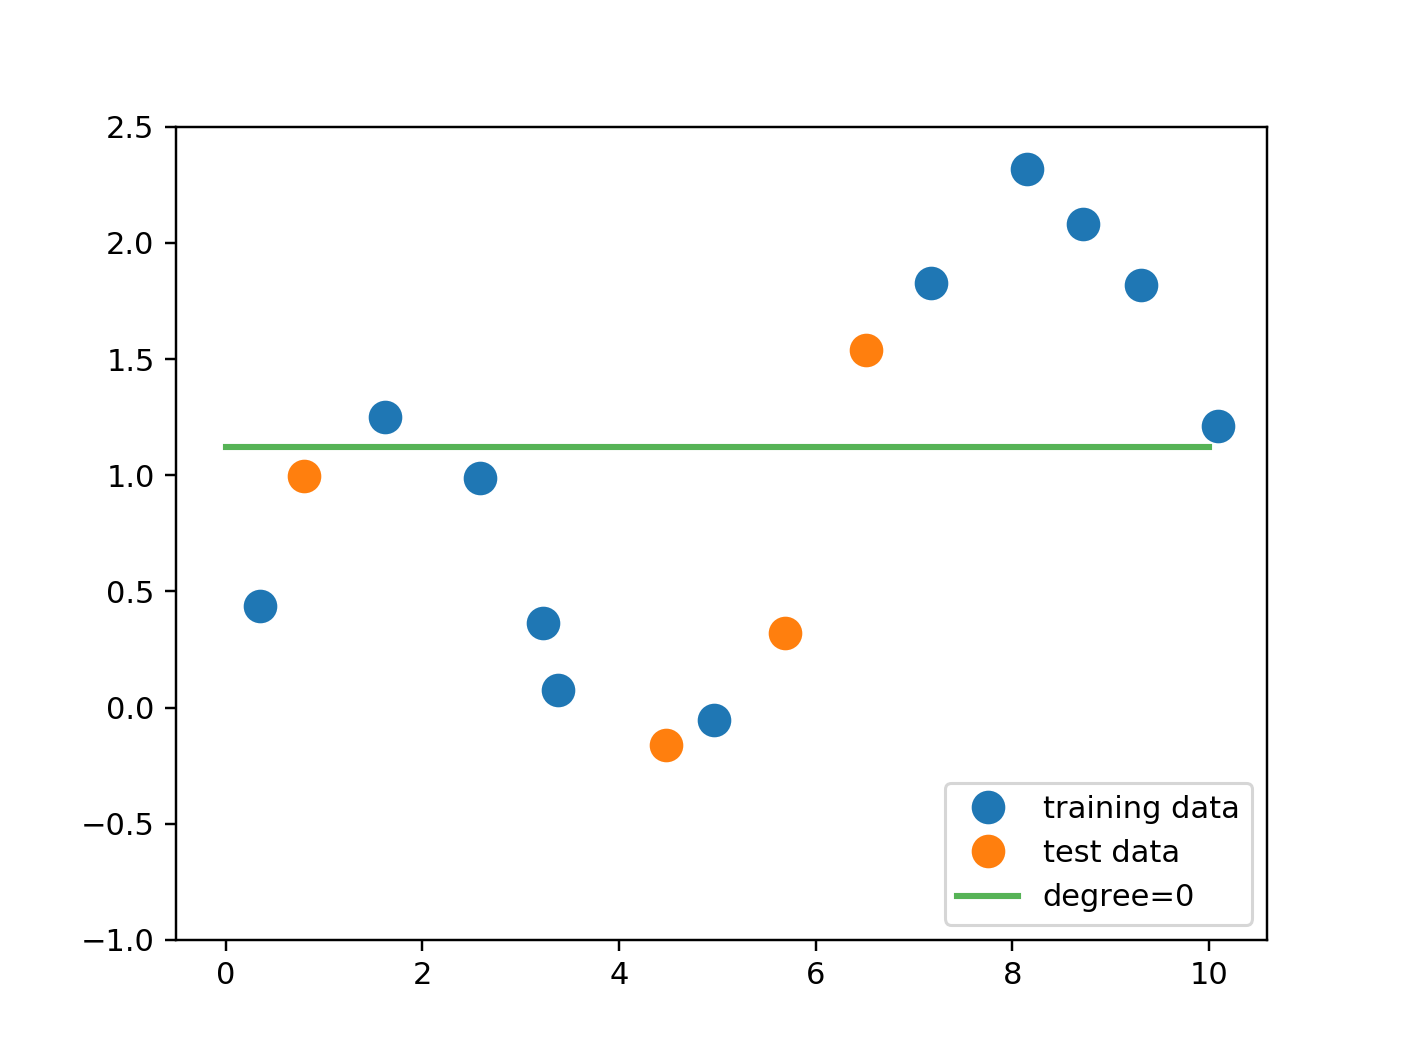

In [217]:
deg = 0
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


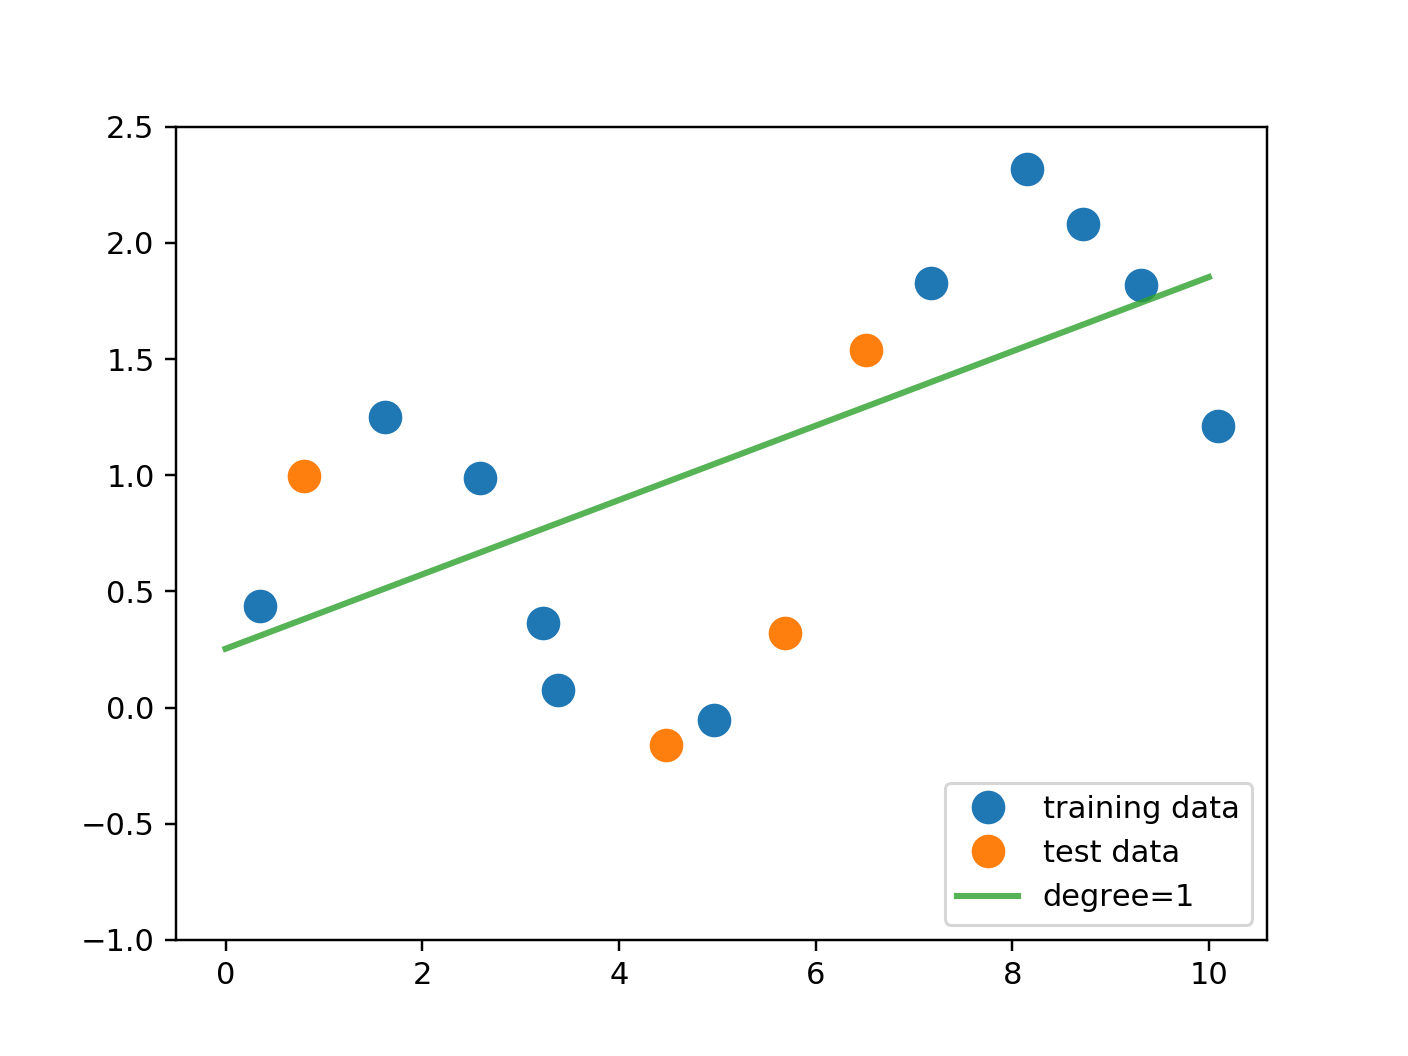

In [218]:
deg = 1
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


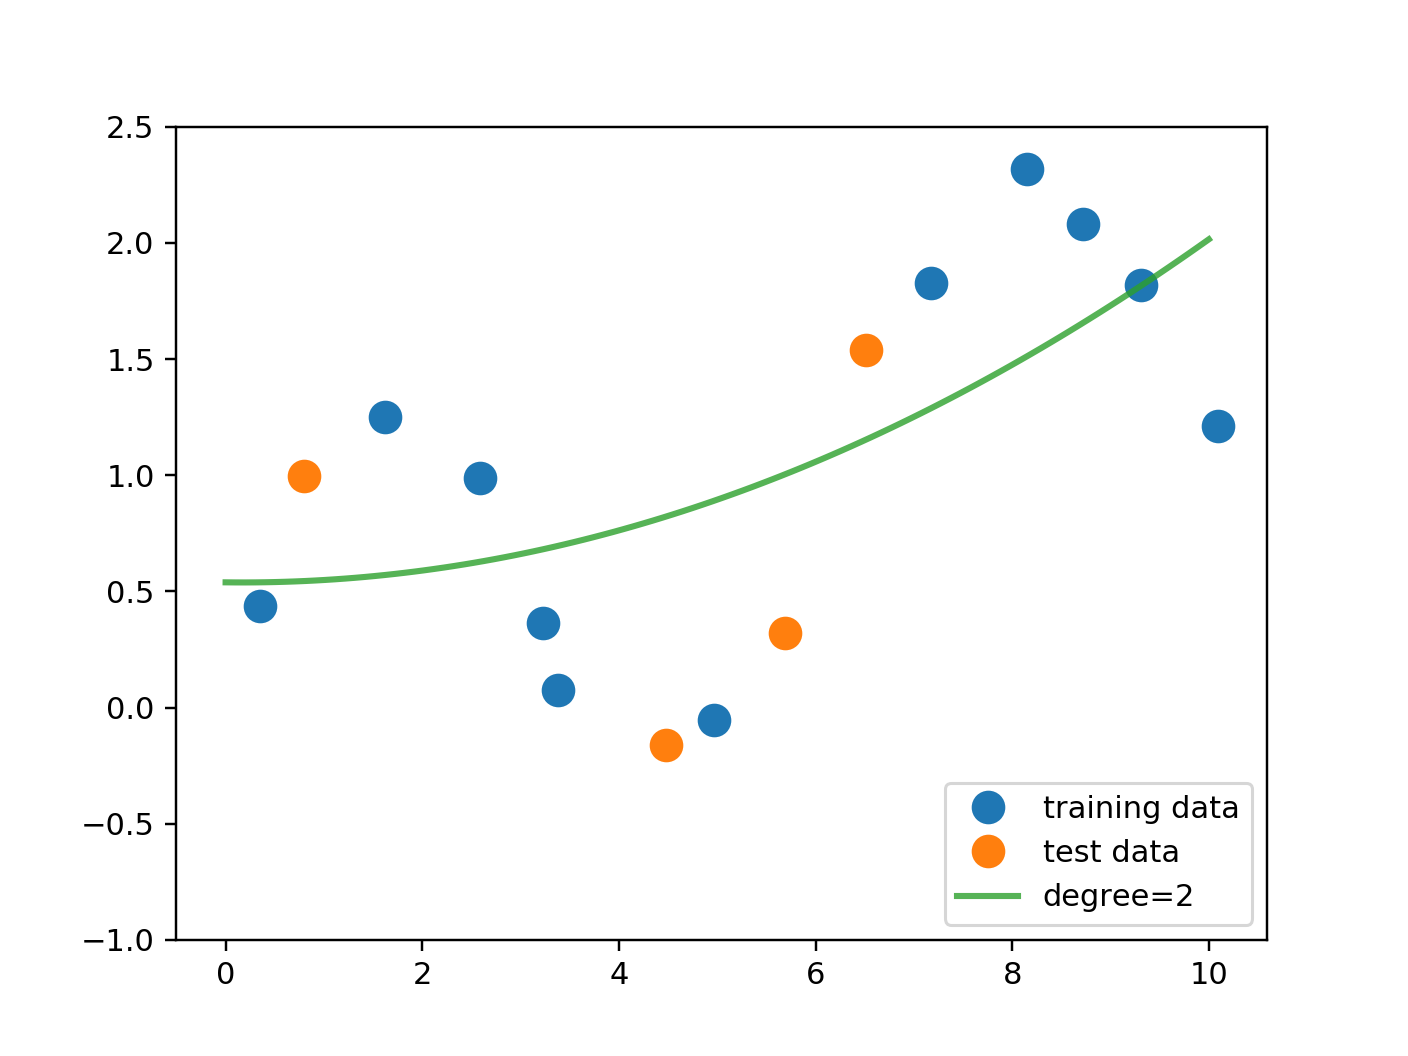

In [219]:
deg = 2
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


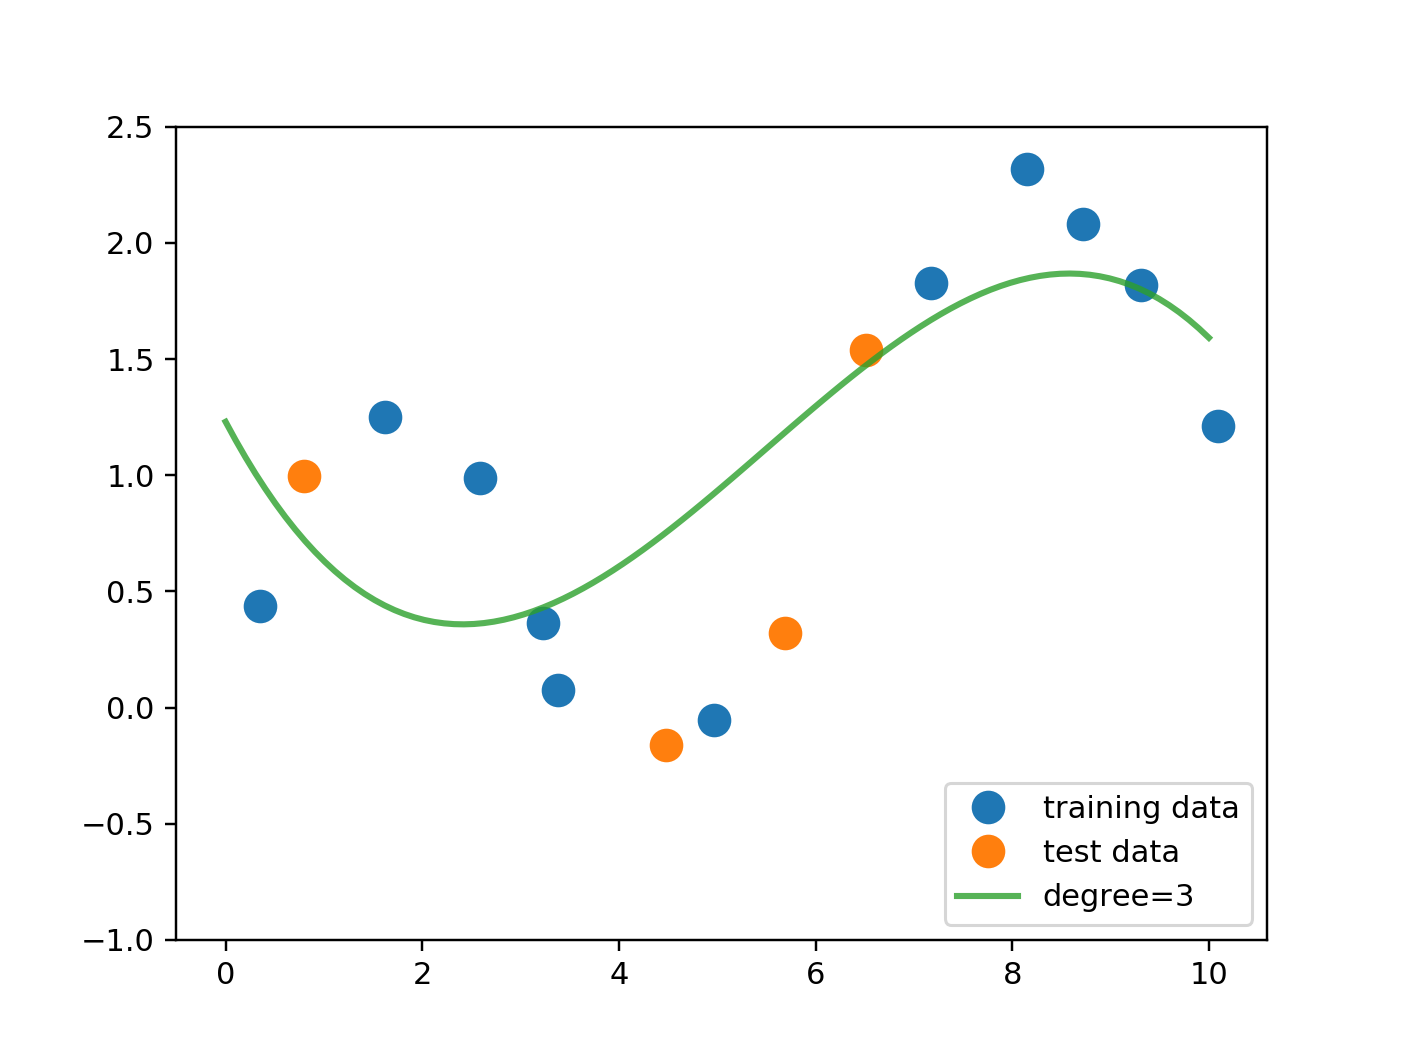

In [220]:
deg = 3
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


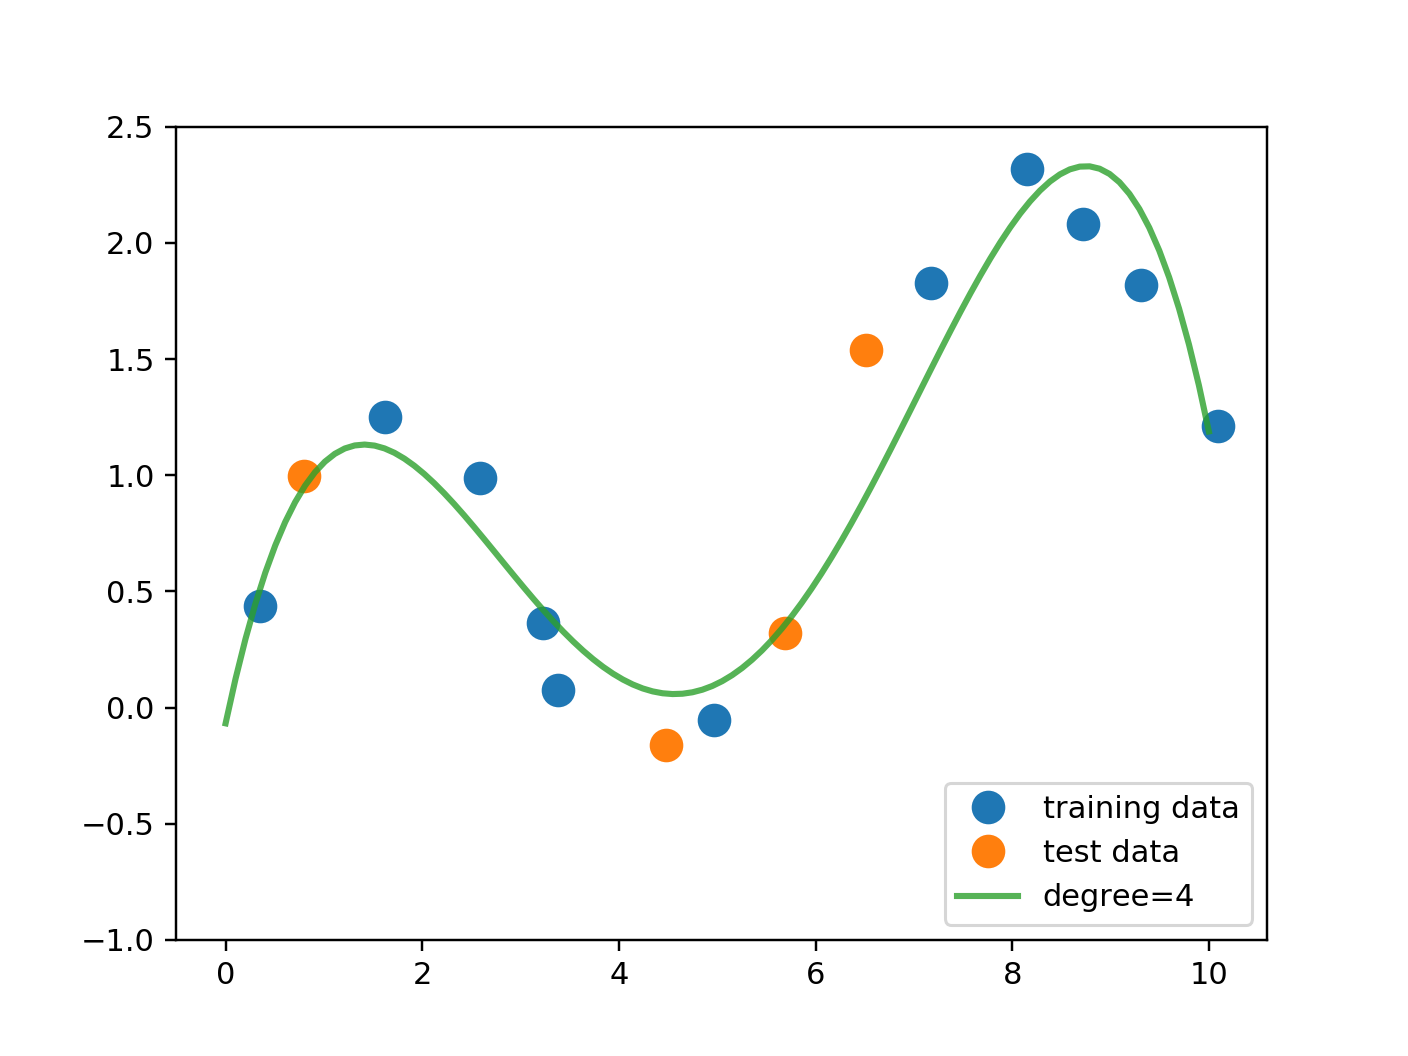

In [221]:
deg = 4
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


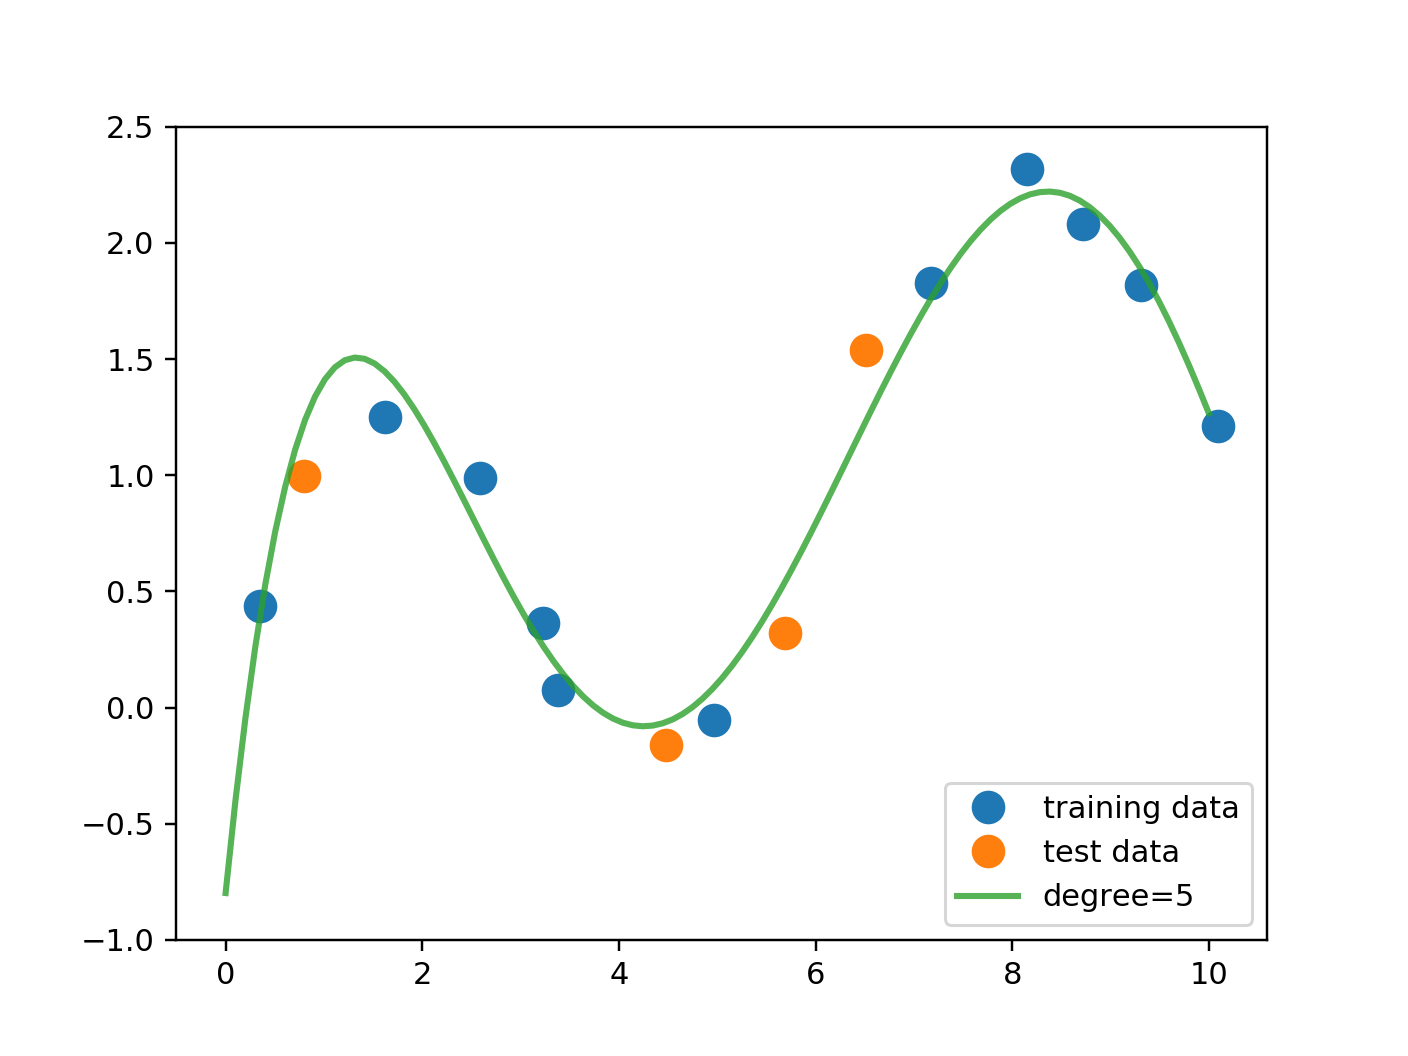

In [222]:
deg = 5
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


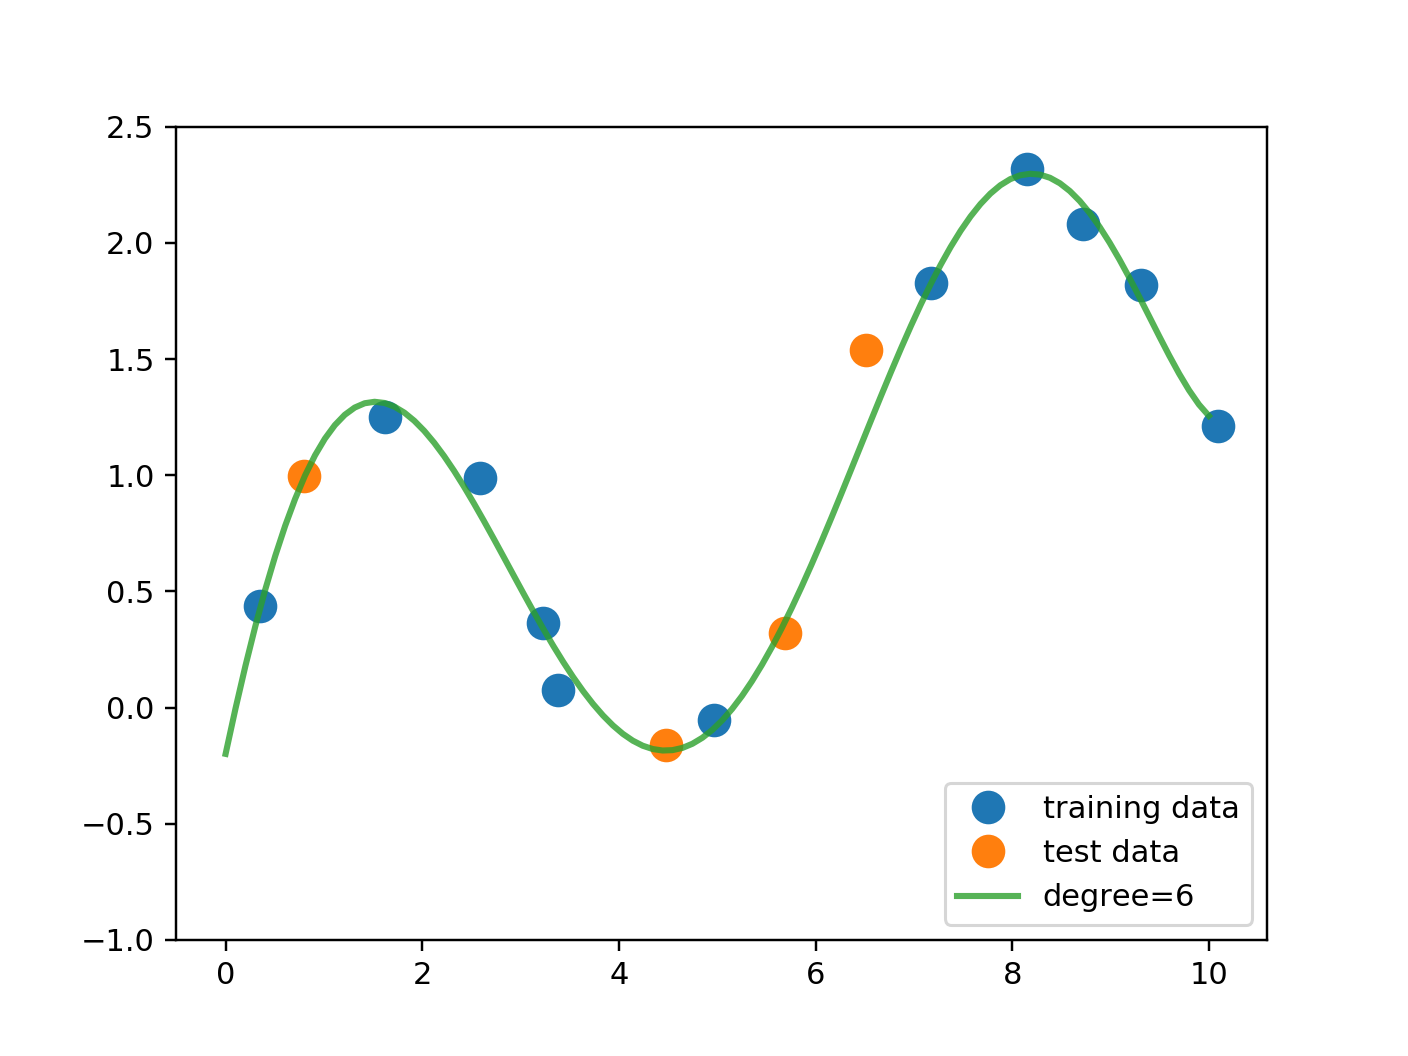

In [223]:
deg = 6
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


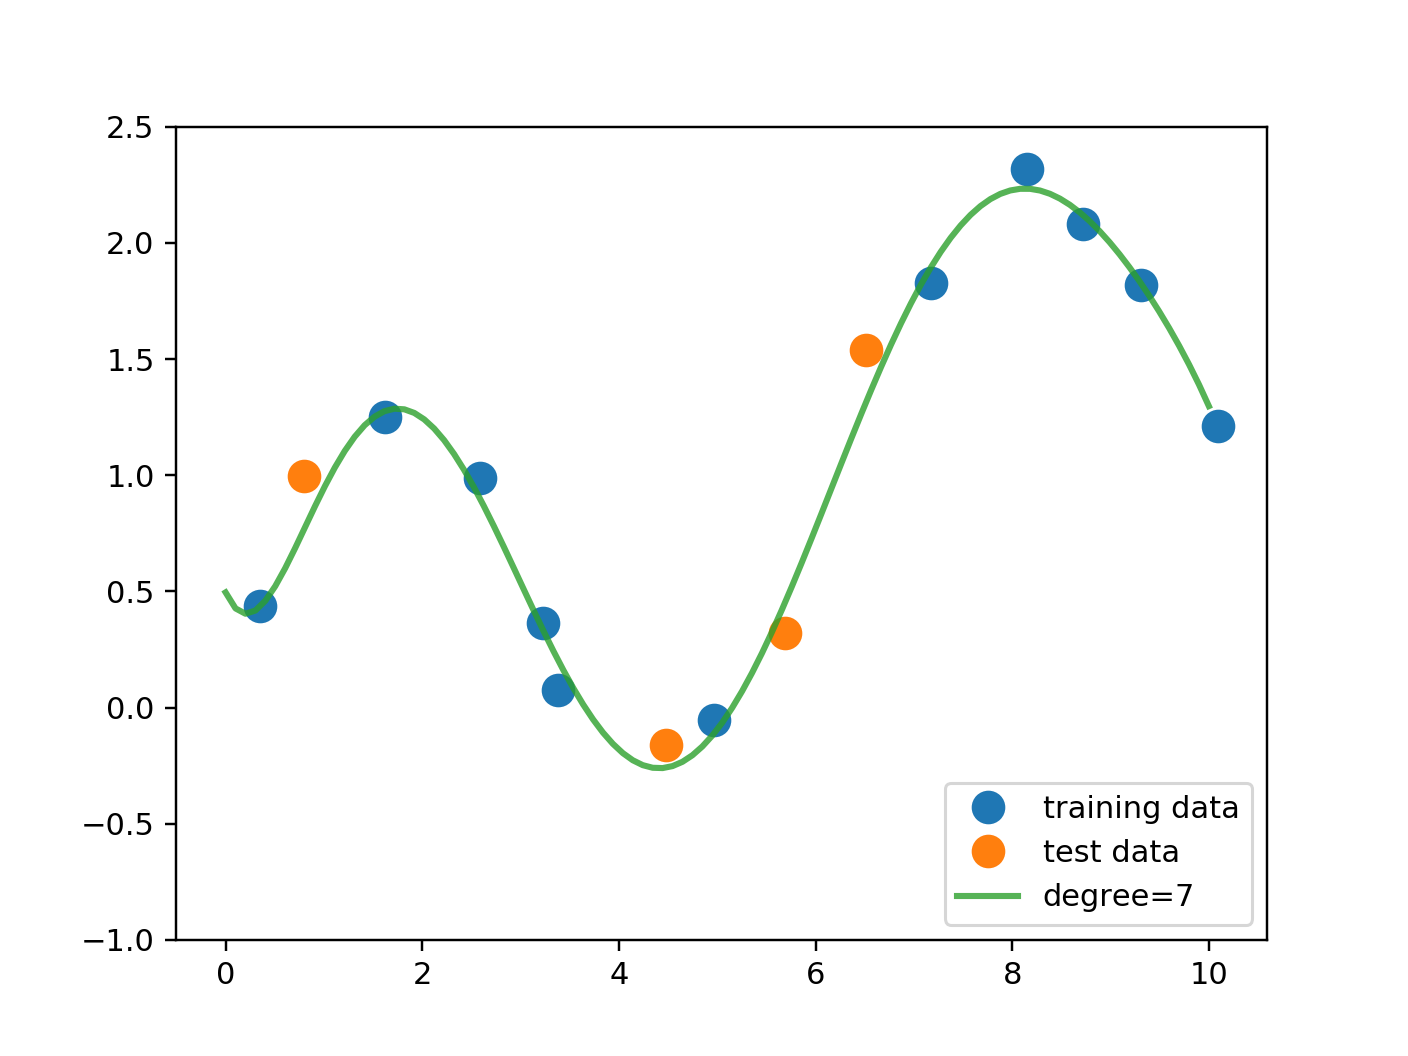

In [224]:
deg = 7
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


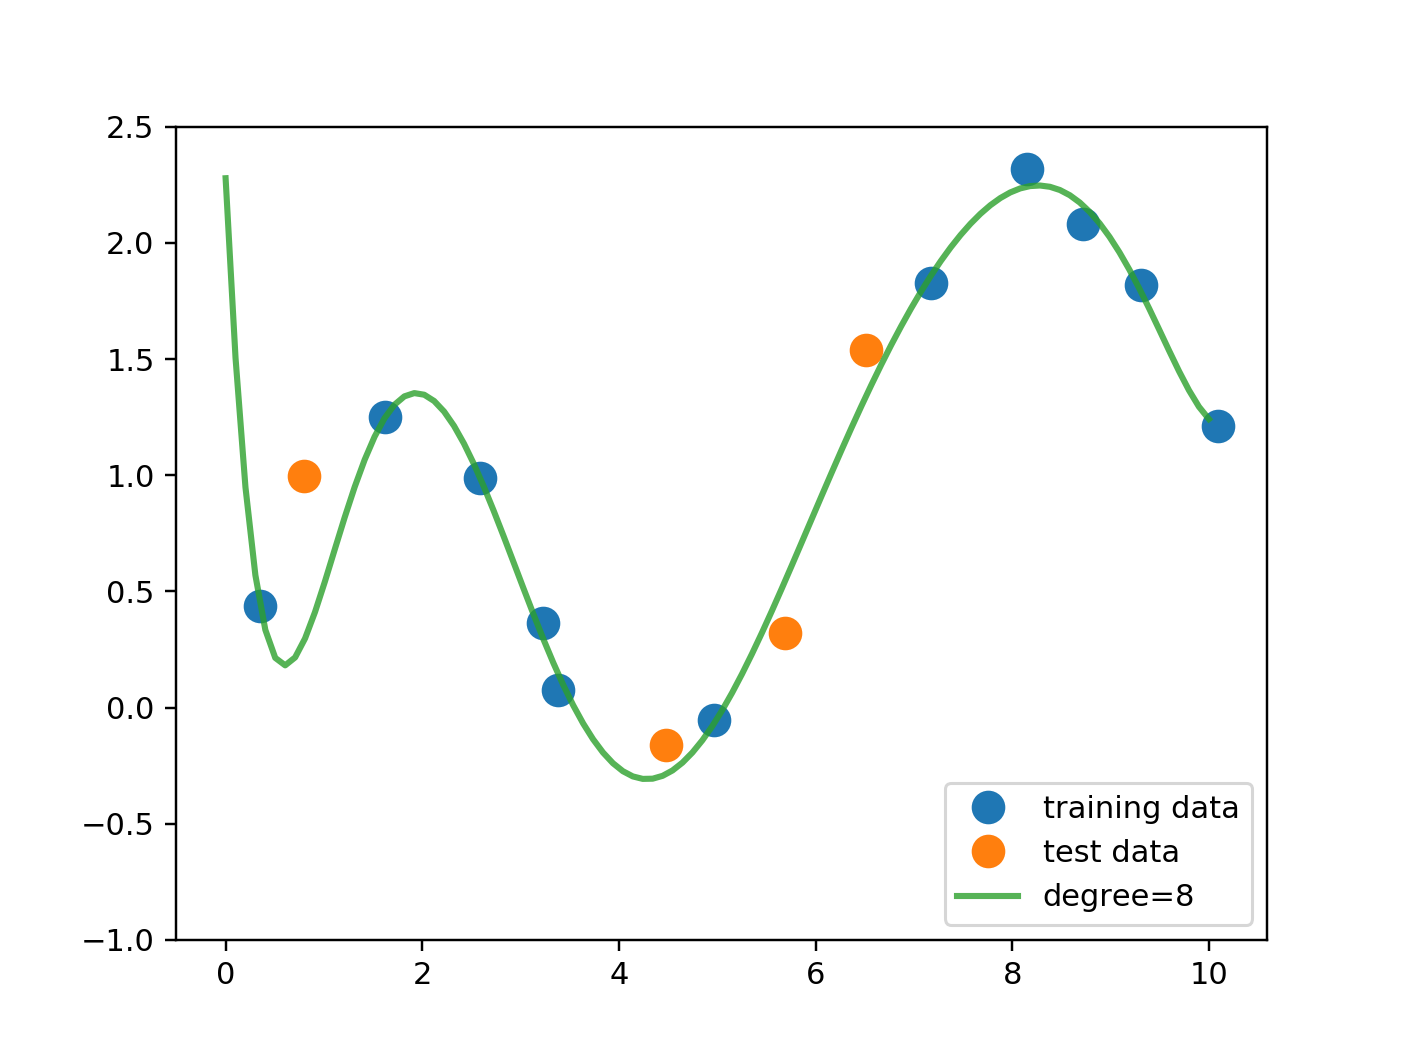

In [225]:
deg = 8
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


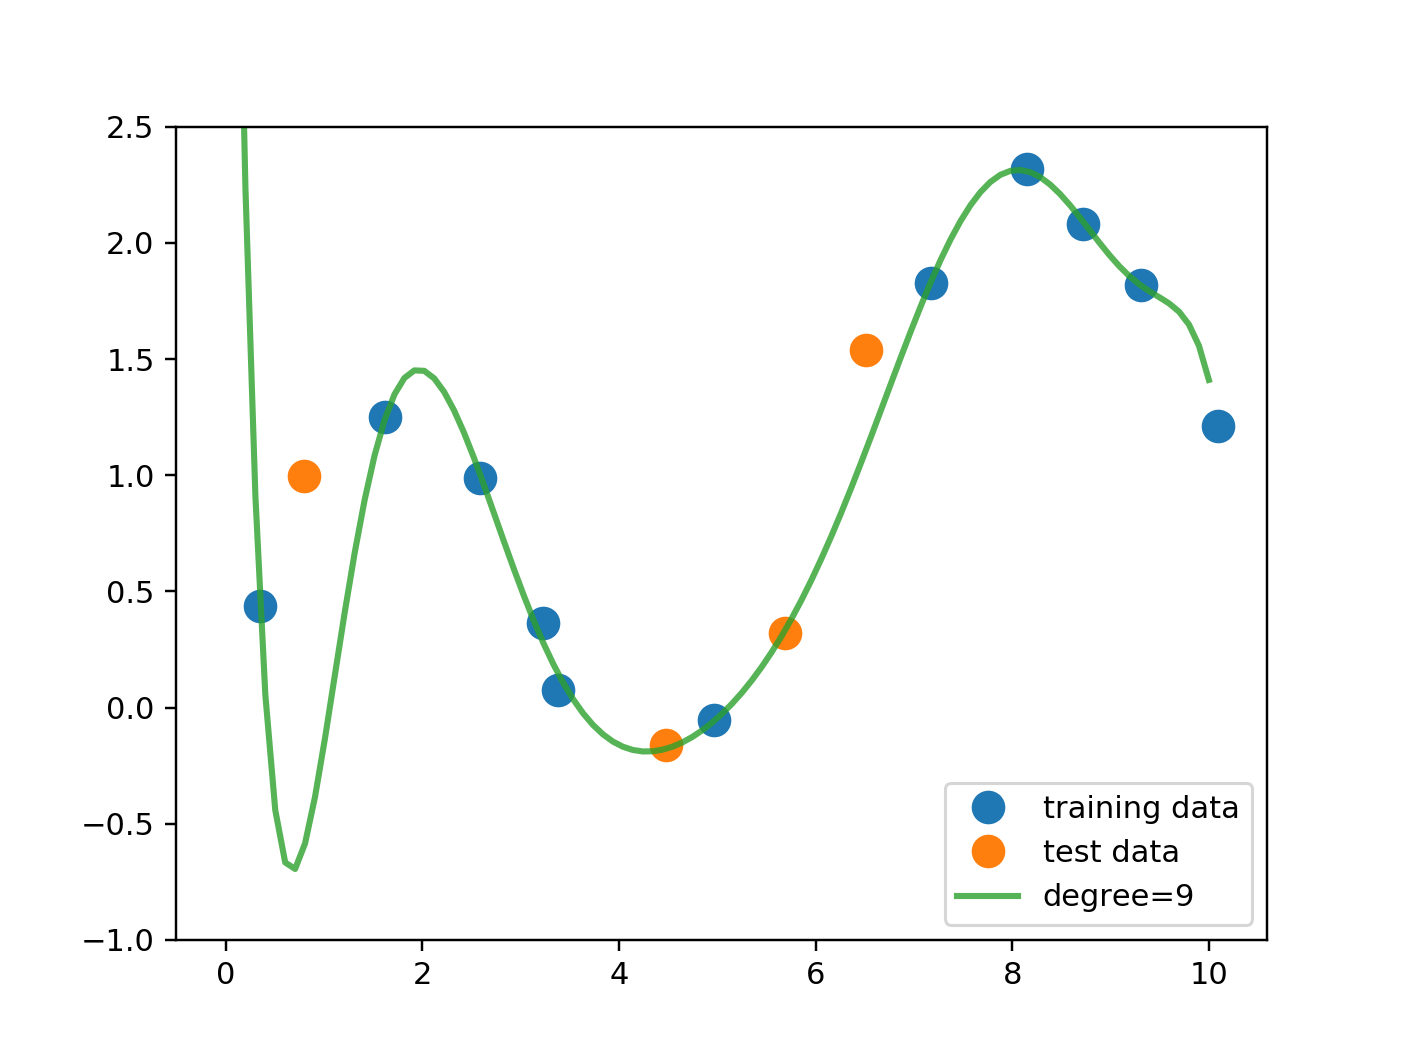

In [226]:
deg = 9
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), three()[deg], alpha=0.8, lw=2, label='degree={}'.format(deg))
plt.ylim(-1,2.5)
plt.legend(loc=4)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [272]:
p12 = PolynomialFeatures(degree=12)
X_train_p12 = p12.fit_transform(X_train.reshape(-1, 1))
X_test_p12 = p12.fit_transform(X_test.reshape(-1, 1))
lm = LinearRegression().fit(X_train_p12, y_train)
test_x = np.linspace(0,10,100).reshape(-1,1)
test_x_p12 = p12.transform(test_x)
lm_predict = lm.predict(test_x_p12)
LinearRegression_R2_test_score = lm.score(X_test_p12, y_test)

In [271]:
p12_l = PolynomialFeatures(degree=12)
X_train_p12_l = p12_l.fit_transform(X_train.reshape(-1, 1))
lmls = Lasso(alpha=0.01, max_iter=10000).fit(X_train_p12_l, y_train)
lmls_predict = lmls.predict(test_x_p12)
Lasso_R2_test_score = lmls.score(X_test_p12, y_test)

/usr/local/Cellar/python3/3.6.4_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


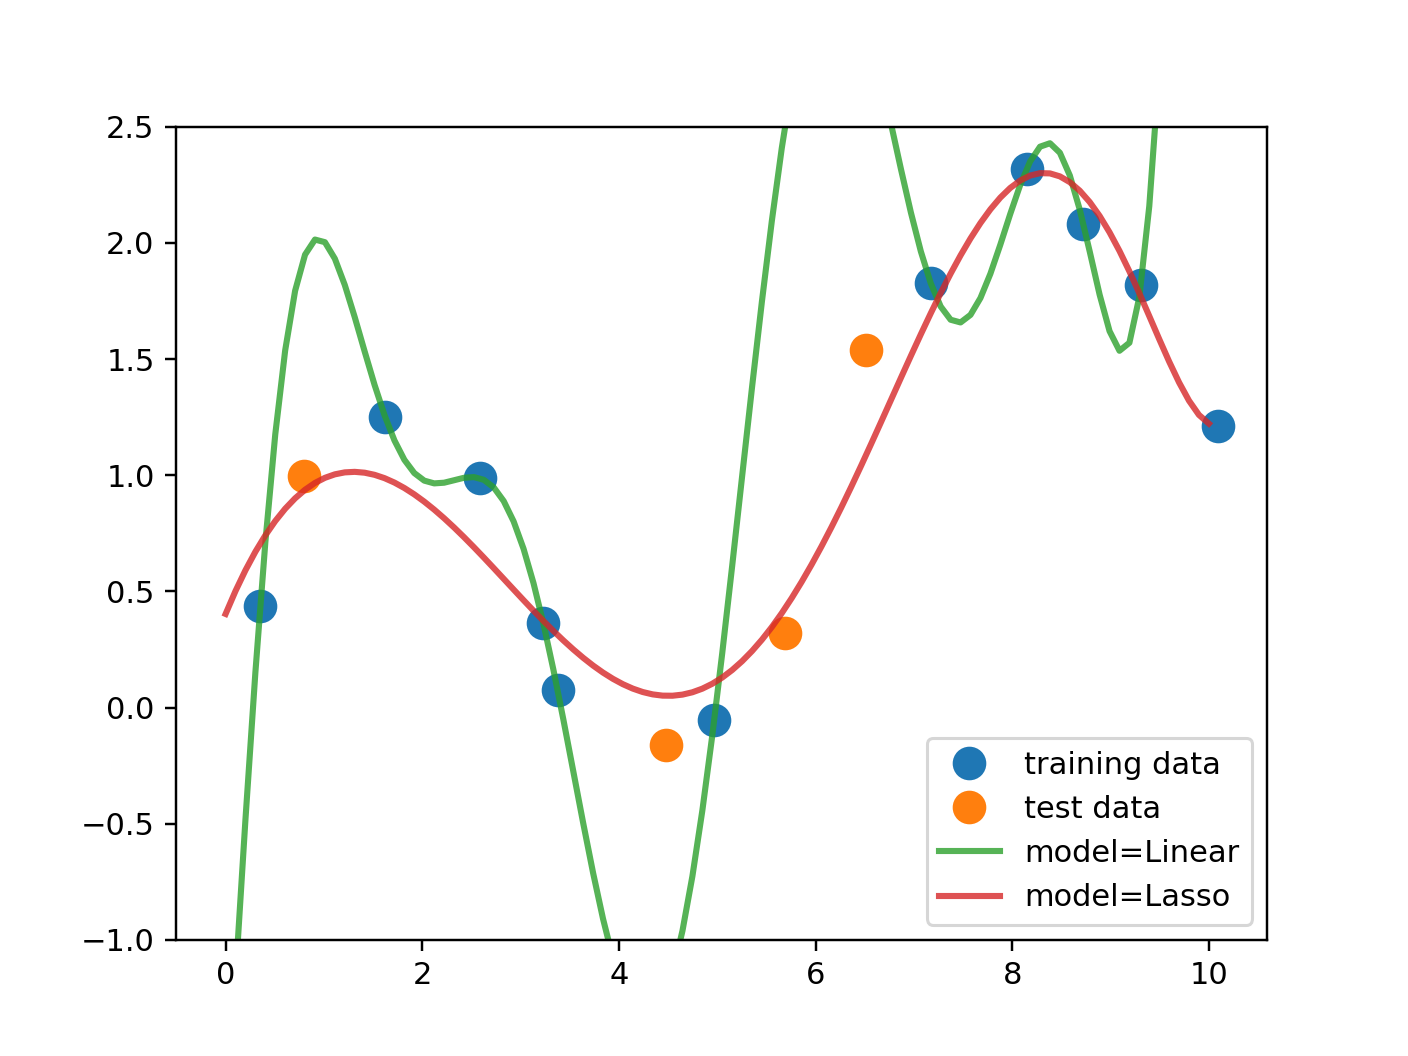

In [267]:
deg = 12
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
plt.plot(np.linspace(0,10,100), lm_predict.flatten(), alpha=0.8, lw=2, label='model={}'.format("Linear"))
plt.plot(np.linspace(0,10,100), lmls_predict.flatten(), alpha=0.8, lw=2, label='model={}'.format("Lasso"))
plt.ylim(-1,2.5)
plt.legend(loc=4)

In [273]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    p12 = PolynomialFeatures(degree=12)
    X_train_p12 = p12.fit_transform(X_train.reshape(-1, 1))
    X_test_p12 = p12.fit_transform(X_test.reshape(-1, 1))
    lm = LinearRegression().fit(X_train_p12, y_train)
    test_x = np.linspace(0,10,100).reshape(-1,1)
    test_x_p12 = p12.transform(test_x)
    lm_predict = lm.predict(test_x_p12)
    LinearRegression_R2_test_score = lm.score(X_test_p12, y_test)
    p12_l = PolynomialFeatures(degree=12)
    X_train_p12_l = p12_l.fit_transform(X_train.reshape(-1, 1))
    lmls = Lasso(alpha=0.01, max_iter=10000).fit(X_train_p12_l, y_train)
    lmls_predict = lmls.predict(test_x_p12)
    Lasso_R2_test_score = lmls.score(X_test_p12, y_test)
    return((LinearRegression_R2_test_score, Lasso_R2_test_score))

In [274]:
answer_four()

/usr/local/Cellar/python3/3.6.4_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.312103541583626, 0.8406625614750428)

# Classification stuff

In [275]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [276]:
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

In [277]:
mush_df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [279]:
mush_df2.head()

class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0        0        1            0            0            0            0   
1        1        0            0            0            0            0   
2        1        0            1            0            0            0   
3        0        1            0            0            0            0   
4        1        0            0            0            0            0   

   cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g    ...      \
0            0            1              0              0    ...       
1            0            1              0              0    ...       
2            0            0              0              0    ...       
3            0            1              0              0    ...       
4            0            1              0              0    ...       

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 119 columns]

### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*

*Note: remember that you also need to set random_state in the DecisionTreeClassifier.*

In [318]:
dtree = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
d = {'Feature Names': X_train2.columns, 'Feature Importance': dtree.feature_importances_}
df_feat = pd.DataFrame(data=d)
df_feat.sort_values(by='Feature Importance', ascending=False, inplace=True)
top5_feat = list(df_feat['Feature Names'][0:5])

In [319]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    d = {'Feature Names': X_train2.columns, 'Feature Importance': dtree.feature_importances_}
    df_feat = pd.DataFrame(data=d)
    df_feat.sort_values(by='Feature Importance', ascending=False, inplace=True)
    top5_feat = list(df_feat['Feature Names'][0:5])
    return(top5_feat)

In [341]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
param_range = np.logspace(-4,1,6)
train_scores, test_scores = validation_curve(SVC(kernel='rbf', C=1, random_state=0),
                                             X_subset, y_subset, param_name='gamma',
                                             param_range=param_range, scoring='accuracy',cv=3)
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

In [336]:
test_scores

array([[0.58554572, 0.56277696, 0.55473373],
       [0.91445428, 0.95125554, 0.92307692],
       [0.98967552, 0.99113737, 0.98816568],
       [1.        , 1.        , 1.        ],
       [0.98967552, 0.9985229 , 0.99704142],
       [0.52212389, 0.52289513, 0.52218935]])

In [337]:
test_scores[0,:]

array([0.58554572, 0.56277696, 0.55473373])

In [339]:
np.mean(test_scores, axis=1)

array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
       0.52240279])

In [342]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    param_range = np.logspace(-4,1,6)
    train_scores, test_scores = validation_curve(SVC(kernel='rbf', C=1, random_state=0),
                                             X_subset, y_subset, param_name='gamma',
                                             param_range=param_range, scoring='accuracy',cv=3)
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    return(mean_train_scores, mean_test_scores)

In [343]:
answer_six()

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

In [345]:
d = {'gamma': np.logspace(-4,1,6), 'train scores': answer_six()[0], 'test scores': answer_six()[1]}
df_scores = pd.DataFrame(data=d)
df_scores = df_scores[['gamma', 'train scores', 'test scores']]

In [348]:
df_scores

gamma  train scores  test scores
0   0.0001      0.566478     0.567685
1   0.0010      0.931560     0.929596
2   0.0100      0.990399     0.989660
3   0.1000      1.000000     1.000000
4   1.0000      1.000000     0.995080
5  10.0000      1.000000     0.522403